<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
#Start Here

import numpy as np
import gensim
import os
import re
from ast import literal_eval

import gensim
import os
import re
from ast import literal_eval

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS 
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS 
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd
import tqdm

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
print(df.shape)
df.head()

(28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [4]:
# subset to a product/category
list(df)

['id',
 'dateAdded',
 'dateUpdated',
 'name',
 'asins',
 'brand',
 'categories',
 'primaryCategories',
 'imageURLs',
 'keys',
 'manufacturer',
 'manufacturerNumber',
 'reviews.date',
 'reviews.dateSeen',
 'reviews.didPurchase',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.numHelpful',
 'reviews.rating',
 'reviews.sourceURLs',
 'reviews.text',
 'reviews.title',
 'reviews.username',
 'sourceURLs']

In [5]:
df['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Home & Garden                      2
Electronics,Furniture              2
Name: primaryCategories, dtype: int64

In [6]:
df = df[df['primaryCategories'] == 'Electronics'].copy()

In [8]:
# Get Tokens
import spacy
nlp = spacy.load("en_core_web_lg")

def tokenize(document):
    """tokenizes text and returns the lemmas, excludes puncttion, and stop words"""
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [9]:
# tokens column

df['tokens'] = df['reviews.text'].apply(tokenize)

In [10]:
df['tokens'].head()

8343    [great, case, place, husband, love, hold, lot,...
8344    [discard, get, rid, broken, cd, case, broken, ...
8345                            [dollar, boycott, amazon]
8346    [initial, impression, good, material, nice, sh...
8347    [pro, Standard, Echo, con, old, generation, Ec...
Name: tokens, dtype: object

In [11]:
# stop words
stop_words = [
    'order',
    'buy',
    'good', 
    'bad',
    'battery'
    'well'
    'perfect'
    
]

stops = nlp.Defaults.stop_words.union(stop_words)

# stop words function
def remove_stops(_list_):
    
    keywords = []
    
    for keyword in _list_:
        
        phrase = []
        
        words = keyword.split()
        
        for word in words:
            if word in stops:
                pass
            else: 
                phrase.append(word)
            
        phrase = ' '.join(phrase)
        
        if len(phrase) > 0:
            keywords.append(phrase)
    
    return keywords

In [12]:
# clean column from tokens for the text reviews column

from tqdm import tqdm

tqdm.pandas()

df['clean_keywords'] = df['tokens'].progress_apply(remove_stops)

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/tqdm/std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 13995/13995 [00:00<00:00, 37965.64it/s]


In [17]:
import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [18]:
# create id2word
id2word = corpora.Dictionary(df['clean_keywords'])
print(len(id2word))

6794


In [14]:
id2word.filter_extremes(no_below=5, no_above=.98)
print(len(id2word))

2162


In [20]:
# create corpus object - represents the transform statement
corpus = [id2word.doc2bow(text) for text in df['clean_keywords']]
corpus[800]

[(6, 1), (83, 1), (166, 1), (175, 1), (543, 1), (883, 1), (1514, 1)]

In [21]:
#create lda model

lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics=5,
                   passes=50, 
                   workers=4
                  )

# print lda model topics with associated words
lda.print_topics()

[(0,
  '0.016*"Amazon" + 0.015*"device" + 0.014*"screen" + 0.014*"like" + 0.012*"tablet" + 0.012*"app" + 0.012*"work" + 0.009*"sound" + 0.008*"great" + 0.008*"little"'),
 (1,
  '0.052*"love" + 0.048*"kid" + 0.046*"tablet" + 0.033*"old" + 0.033*"year" + 0.022*"great" + 0.018*"game" + 0.018*"app" + 0.016*"child" + 0.015*"use"'),
 (2,
  '0.066*"easy" + 0.063*"use" + 0.049*"love" + 0.039*"gift" + 0.026*"great" + 0.022*"read" + 0.018*"Christmas" + 0.015*"purchase" + 0.013*"enjoy" + 0.012*"like"'),
 (3,
  '0.049*"tablet" + 0.028*"great" + 0.027*"book" + 0.023*"read" + 0.022*"use" + 0.017*"game" + 0.016*"app" + 0.014*"Amazon" + 0.014*"movie" + 0.013*"price"'),
 (4,
  '0.052*"tablet" + 0.049*"great" + 0.035*"price" + 0.026*"love" + 0.025*"Fire" + 0.021*"Kindle" + 0.017*"fire" + 0.017*"purchase" + 0.016*"kindle" + 0.015*"8"')]

In [22]:
# see most valuable words associated with each topic in a reader-friendly version
# by applying regular expression

words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(20)]
words


[['"Amazon"',
  '"device"',
  '"screen"',
  '"like"',
  '"tablet"',
  '"app"',
  '"work"',
  '"sound"',
  '"great"',
  '"little"'],
 ['"love"',
  '"kid"',
  '"tablet"',
  '"old"',
  '"year"',
  '"great"',
  '"game"',
  '"app"',
  '"child"',
  '"use"'],
 ['"easy"',
  '"use"',
  '"love"',
  '"gift"',
  '"great"',
  '"read"',
  '"Christmas"',
  '"purchase"',
  '"enjoy"',
  '"like"'],
 ['"tablet"',
  '"great"',
  '"book"',
  '"read"',
  '"use"',
  '"game"',
  '"app"',
  '"Amazon"',
  '"movie"',
  '"price"'],
 ['"tablet"',
  '"great"',
  '"price"',
  '"love"',
  '"Fire"',
  '"Kindle"',
  '"fire"',
  '"purchase"',
  '"kindle"',
  '"8"']]

In [23]:
# topic labels (list to str format)

topic_labels= [', '.join(t[0:5]) for t in words]
topic_labels

['"Amazon", "device", "screen", "like", "tablet"',
 '"love", "kid", "tablet", "old", "year"',
 '"easy", "use", "love", "gift", "great"',
 '"tablet", "great", "book", "read", "use"',
 '"tablet", "great", "price", "love", "Fire"']

In [24]:
for id, t in enumerate(topic_labels): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
"Amazon", "device", "screen", "like", "tablet"

------ Topic 1 ------
"love", "kid", "tablet", "old", "year"

------ Topic 2 ------
"easy", "use", "love", "gift", "great"

------ Topic 3 ------
"tablet", "great", "book", "read", "use"

------ Topic 4 ------
"tablet", "great", "price", "love", "Fire"



In [27]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# analyze + visualize lda model

import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.075114  0.059379       1        1  23.839653
0      0.150421  0.130302       2        1  22.110514
1     -0.132312 -0.032292       3        1  21.962053
4      0.090316 -0.208943       4        1  18.543583
2     -0.183538  0.051554       5        1  13.544198, topic_info=           Term         Freq        Total Category  logprob  loglift
1382        kid  1898.000000  1898.000000  Default  30.0000  30.0000
83         easy  2506.000000  2506.000000  Default  29.0000  29.0000
239         use  3277.000000  3277.000000  Default  28.0000  28.0000
6          love  4457.000000  4457.000000  Default  27.0000  27.0000
901        gift   974.000000   974.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
189        item   124.559673   311.444150   Topic5  -5.2870   1.0828
1542   daughter   154.629188   747.074825   Topic5  -5.0708   0.4241
46         work   175.482499  1607.740362   Topic5  -4.9443  -0.2158
200   recommend   146.364445   793.209478   Topic5  -5.1257   0.3092
142        time   128.807575  1126.841281   Topic5  -5.2535  -0.1696

[375 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
3178      1  0.043064    128
3178      4  0.925871    128
487       1  0.040218     16
487       4  0.908927     16
487       5  0.040218     16
...     ...       ...    ...
133       3  0.879545   year
133       4  0.111549   year
133       5  0.004056   year
1395      3  0.996812  young
1544      3  0.996939     yr

[663 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 5, 3])

In [29]:
distro = [lda[doc] for doc in corpus]
distro[0]

[(0, 0.2255033),
 (1, 0.2552626),
 (2, 0.4740507),
 (3, 0.022530911),
 (4, 0.022652434)]

In [30]:
def update(doc):
    d_dist = {k:0 for k in range(0,5)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in distro]

topics = pd.DataFrame.from_records(new_distro)
topics.columns = topic_labels

topics.head()

,"""Amazon"", ""device"", ""screen"", ""like"", ""tablet""","""love"", ""kid"", ""tablet"", ""old"", ""year""","""easy"", ""use"", ""love"", ""gift"", ""great""","""tablet"", ""great"", ""book"", ""read"", ""use""","""tablet"", ""great"", ""price"", ""love"", ""Fire"""
0,0.225503,0.255263,0.474051,0.022531,0.022652
1,0.595591,0.280024,0.117421,0.000000,0.000000
2,0.793643,0.051055,0.050431,0.054370,0.050502
3,0.901155,0.043689,0.000000,0.028305,0.025484
4,0.748985,0.016323,0.015597,0.015712,0.203383


In [32]:
df['primary_topic'] = topics.idxmax(axis=1)
df['primary_topic'].value_counts()

"tablet", "great", "price", "love", "Fire"        512
"tablet", "great", "book", "read", "use"          484
"easy", "use", "love", "gift", "great"            329
"love", "kid", "tablet", "old", "year"            201
"Amazon", "device", "screen", "like", "tablet"    164
Name: primary_topic, dtype: int64

In [33]:
agg = pd.pivot_table(df, values=['reviews.text'], 
                     index=['primary_topic'], 
                     columns=['reviews.rating'], aggfunc='count')
agg

reviews.text                  
reviews.rating                                            1   2   3    4    5
primary_topic                                                                
"Amazon", "device", "screen", "like", "tablet"            3   1   8   34  118
"easy", "use", "love", "gift", "great"                    7   6  12   66  238
"love", "kid", "tablet", "old", "year"                    2   2   9   51  137
"tablet", "great", "book", "read", "use"                  7  12  20  107  338
"tablet", "great", "price", "love", "Fire"                7   9  21  105  370

In [34]:
agg = agg.reset_index()
agg

primary_topic reviews.text  \
reviews.rating                                                            1   
0               "Amazon", "device", "screen", "like", "tablet"            3   
1                       "easy", "use", "love", "gift", "great"            7   
2                       "love", "kid", "tablet", "old", "year"            2   
3                     "tablet", "great", "book", "read", "use"            7   
4                   "tablet", "great", "price", "love", "Fire"            7   

                                  
reviews.rating   2   3    4    5  
0                1   8   34  118  
1                6  12   66  238  
2                2   9   51  137  
3               12  20  107  338  
4                9  21  105  370

In [35]:
agg.columns = ['primary_topic', '1','2','3','4','5']
agg.head()

,primary_topic,1,2,3,4,5
0,"""Amazon"", ""device"", ""screen"", ""like"", ""tablet""",3,1,8,34,118
1,"""easy"", ""use"", ""love"", ""gift"", ""great""",7,6,12,66,238
2,"""love"", ""kid"", ""tablet"", ""old"", ""year""",2,2,9,51,137
3,"""tablet"", ""great"", ""book"", ""read"", ""use""",7,12,20,107,338
4,"""tablet"", ""great"", ""price"", ""love"", ""Fire""",7,9,21,105,370


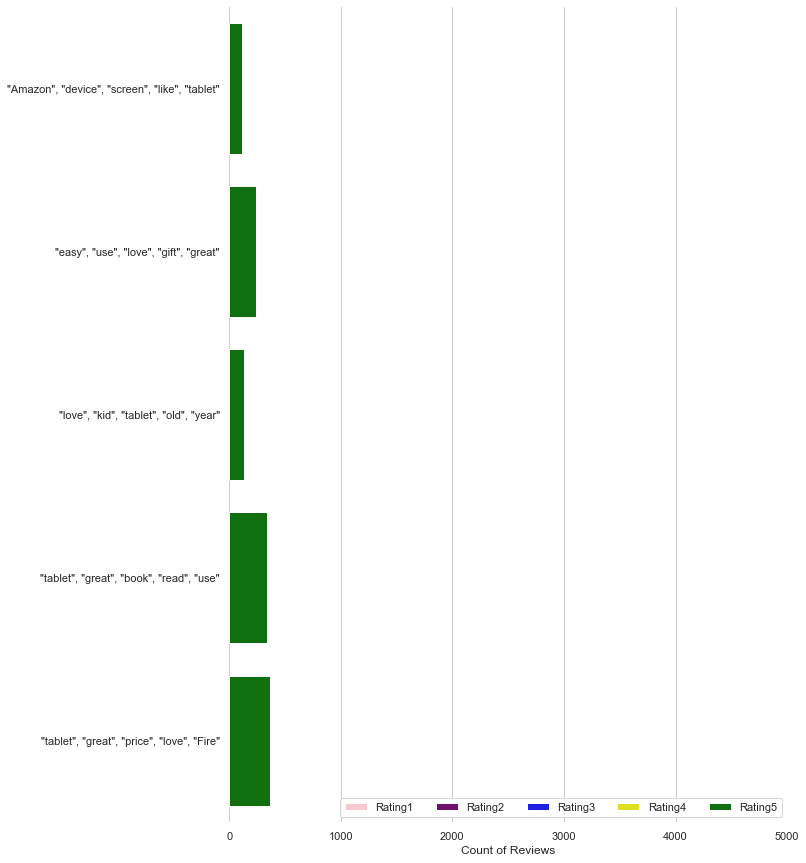

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(10, 15))

# sns.set_color_codes('pastel')
sns.barplot(x='1', y='primary_topic', data=agg, label="Rating1", color="pink")

# sns.set_color_codes('muted')
sns.barplot(x='2', y='primary_topic', data=agg, label="Rating2", color="purple")

# sns.set_color_codes('deep')
sns.barplot(x='3', y='primary_topic', data=agg, label="Rating3", color="blue")


sns.barplot(x='4', y='primary_topic', data=agg, label="Rating4", color="yellow")

sns.barplot(x='5', y='primary_topic', data=agg, label="Rating5", color="green")

ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(xlim=(0,5000), ylabel="", xlabel="Count of Reviews")
sns.despine(left=True, bottom=True)

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling